

<span style="font-family:Lucida Bright;">
<p style="margin-bottom:0.5cm"></p>
<center>
<font size="8"><b>Deep Learning, Fall 2021</b></font>
<p style="margin-bottom:0.6cm"></p>
<font size="3"><b>Final Project:</b></font>
<p style="margin-bottom:0.6cm"></p>
<font size="5"><b>Enhancing Voices for Better Speech Intelligibility</b></font>
<p style="margin-bottom:2cm"></p>
<font size="6"><b>Start</b></font>
</center>
<p style="margin-bottom:2cm"></p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#How-to-get-the-most-out-of-this-notebook" data-toc-modified-id="How-to-get-the-most-out-of-this-notebook-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>How to get the most out of this notebook</a></span></li><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prerequisites</a></span></li><li><span><a href="#Links-and-resources" data-toc-modified-id="Links-and-resources-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Links and resources</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#TIMIT-dataset" data-toc-modified-id="TIMIT-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>TIMIT dataset</a></span></li><li><span><a href="#Synthetic-speech-dataset" data-toc-modified-id="Synthetic-speech-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Synthetic speech dataset</a></span></li></ul></li></ul></li></ul></div>

# Introduction

Many people struggle to understand speech in challenging acoustic environments, such as noisy bar. Therefore, enhancing the intelligibility of noisy speech signals is one of the key challenges for any producer of modern communication devices.

The problem is often tackled by dividing a noisy speech signal into a number of frequency bands and attenuating the ones where the signal-to-noise ratio is insufficient. This approach, while effective in some situations, often leads to poor results, and sometimes even exacerbates the problem it is trying to solve as the constant activation and disactivation of some of the frequency bands in response to the fluctuations in speech and noise can create a very unnatural and disturbing sounds.

In this project, we will try a different approach and attempt to create a deep learning model that will produce an equalization curve that can be applied to the noisy speech signal in order to maximize its intelligibility. This will be done by running a clear speech signal through a model of human auditory processing of and searching for a combination of parameters that produce a frequency-gain curve that, when applied to the noisy signal, creates the output most similar to that of clear speech.

## Official project description

In the info-doc for the Deep Learning course, the project is described as follows:

> **Designing self-driving earbuds with [augmentedhearing.io](augmentedhearing.io) which enhance voices based on function correlated with speech intelligibility**
>
> As one in four adults struggle to understand speech in challenging acoustics we aim to train consumer earbuds to enhance voices through back propagation using DHASP model implemented using [PyTorch differentiation package](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) validated on [TIMIT speech dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3) based on an objective function correlated with [HASPI speech intelligibility auditory processing model](https://www.sciencedirect.com/science/article/pii/S0167639320300431) available in Matlab.

## The approach

The time scope for the course is normed to 7 days of 9 hours, which amounts to 63 hours. The outcome should be documented in a report formatted as a [conference paper](https://drive.google.com/file/d/0BxJRy96AHCJxaUEwOFhwUExmX00/view?usp=sharing&resourcekey=0-RvwJqDVrZVijbkkifLWoYA), as well as a Jupyter notebook that ideally should recreate the main results of the report.

At the beginning of the project, the following resources were available:

1. speech data: a TIMIT dataset consisting of 10 sentences spoken by 630 speakers from 8 major dialect regions of the United States
2. an [article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) describing a proposal for a differentiable objective function that can be used to train a neural network. The function is a measure of similarity of a [cepstrum](https://en.wikipedia.org/wiki/Cepstrum) of a given speech signal to the cepstrum of the target signal (usually clear, noisless speech)
3. Matlab code for calculating the [HASPI speech intelligibility index] that can be used to evaluate the results.

In turn, to create a our model, we need the following:

1. clear speech audio data to use as the target for model
2. the corresponding noisy speech audio data to train the model
3. a PyTorch implementation of the equalization filter that can be applied to the noisy speech signal. Our model will optimize the parameters of this filter to maximize speech intelligibility
4. a working PyTorch implementation of the objective function proposed in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571).

Therefore, before we could start creating and tweaking our neural network, we needed to obtain the prerequisites 2 - 4, of which especially number 4: implementation of the objective function proposed in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) was, as I will demonstrate later, all but straightforward.

To obtain a fully functional model would require going through and understanding the project literature, obtaining the prerequisites, crating and optimizing the neural network, and documenting of the findings, which is a task that extends way beyond the 63-hour scope of this project. I have dedicated more than 3 times as much time, and concentrated my effort on obtaining a functioning implementation of the all the prerequisites necessary to build a neural network that can be used to optimize our objective. Judged by the results I will present in this notebook, I might have succeeded.

# How to get started

This notebook is a part of project. To be able to execute all of its content:

1. Download the project repository: `https://github.com/wojciechdk/deep-learning-2021-final-project.git` and run the notebook from the root.
2. Install the necessary packages specified in the file `[project_root]/requirements.txt`. It can be done in one hook by running the command `pip install -r requirements.txt` from the command prompt from the project root.
3. Download the [TIMIT dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3), unpack it, and place it so that the folders *DOC*, *TEST*, and *TRAIN* are placed in the folder `[project_root]/resources/data/TIMIT`.
4. Download the Sythetic Speech dataset created by Pawel Maciej Darulewski (for permission, please contact Pawel at s200123@student.dtu.dk). Place the data from the folder containing full length sentences in the folder `[project_root]/resources/data/synthetic_speech/full_length` and the data from the folder containing 5s segments in the folder `[project_root]/resources/data/synthetic_speech/cut_5_s`.

Furthermore, to fully enjoy the content, please take note of the following:

- The outputs of pre-executed cells may not be rendered properly unless the notebook is **Trusted**.
- To avoid accidental changes, most of the cells in this notebook are marked-as read only, and many are frozen (i.e. disabled from being run). To take advantage of these features, it is recommended to use the extension
[Freeze Cell](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/freeze/readme.html) which works with Jupyter Notebook.

## The organization of the project repository

### Functions and modules

To keep the code clean, all the functions created by the author in the course of this project are defined in the modules of the package `toolbox` residing the folder `[project_root]/toolbox`. Each module contains the functions belonging to the category indicated by the name of the module.

The following modules are used in the project:

- `initialization`: contains all the code that needs to be executed before anything else, such as imports of necessary packages, setting of options, definition of project paths, etc.
- `imports`: contains the imports of all the packages needed in this project.
- `configuration`: contains the code that defines the options regarding the appearance and interactivity of the Jupyter Notebook, Pandas, etc.
- `paths`: contains a class containing all the paths necessary to run this project.
- `data_loading`: contains the functions that help load the data into meaningful structures, such as the functions that load all the metadata about the TIMIT and Synthetic Speech datasets into respective Pandas dataframes.
- `dhasp`: contains the class containing a PyTorch implementation of the Differentiable Hearing Aid Speech Processing (DHASP) model described in this [article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571)
- `dsp`: contains the functions used for processing of signals and extracting their metrics.
- `plotting`: contains the functions that help plot the data in this project.
- `sound`: contains the functions make it easy to listen to the audio used in this project.
- `type_conversion`: contains the functions that facilitate the conversion between different data types, e.g. numpy and a torch.
- `general`: contains the functions that were not given a category of their own.
- -`tests`: contains all the tests that can be conducted to ensure that the code is working correctly.

### Tests

All the tests conducted to ensure that the code is working correctly are gathered in the class `Tests` in the module `[project_root]/toolbox/tests.py`

Where possible, the tests are performed on at least 2 different audio signals residing in a torch tensor, in which each row represents one audio signal. This is done to ensure that the functions also work when the input is 2-dimensional.

### Resources

The project's resources are placed in the folder `[project_root]/resources` and include:
- `cache`: the cached data, such as the metadata about the TIMIT and Synthetic Speech dataset.
- `data`: the audio files for the TIMIT and Synthetic Speech dataset.
- `matlab`: the Matlab code containing the functions used for calculation of the [HASPI speech intelligibility auditory processing model](https://www.sciencedirect.com/science/article/pii/S0167639320300431)
- `stoi_examples`: contains a Jupyter Notebook containing examples of how to use a Python package to calculate speech intelligibility metrics alternative to HASPI.


# Initialization

The entire initialization process, including:
 - imports of the necessary packages
 - configuration of the notebook and packages
 - imports of the toolbox functions

is defined in the file `[project_root]/toolbox/initialization.py`. Let's run it:

In [1]:
import torch

from toolbox.initialization import *

Everything is now initialized and the project paths are available in the variable `paths`. Let's view one path:

In [2]:
display(paths.data.timit.root)

WindowsPath('G:/My Drive/DTU/Kurser/Deep_Learning_02456/final_project/resources/data/TIMIT')

# Load information about the audio data

At the beginning of the project, the only audio data I had at my disposal was the [TIMIT dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3). This dataset consists of 10 sentences spoken by 630 speakers from 8 major dialect regions of the United States. However, the data contains only recordings containing clean speech, while our objective function which measures similarity between the [cepstral](https://en.wikipedia.org/wiki/Cepstrum) sequences for two audio signals, requires both clean and noisy versions of the same speech segment.

Instead of generating the noisy data, I was offered by Pawel Maciej Darulewski to use a set containing samples of synthetically generated speech in different acoustical situations, which he has created for a similar project. In the following, I will therefore use Pawel's audio data. I have, however, implemented functions that allow easy access to both the TIMIT and Pawel's Synthetic Speech datasets, which I will present in the following sections.



## TIMIT dataset

The metadata about the TIMIT dataset is loaded using the function `load_timit_data` defined in the module `[project_root]\toolbox\data_loading.py`. Once loaded, the data is saved in the project cache as a Pandas dataframe. Let's load it and show a couple of rows:

In [3]:
# Load the TIMIT meta data from the cache.
df_timit = pd.read_pickle(paths.cache.df_timit)

# Show the top 5 rows
display(df_timit.sample(5))

,sentence_number,data_group,dialect,gender,speaker,type,text,audio_path,start_sample,end_sample,words_text,words_start_sample,words_end_sample,phonemes_text,phonemes_start_sample,phonemes_end_sample
2107,30,train,South Midland,M,CSS0,phonetically-compact,Get a calico cat to keep.,train\DR4\MCSS0\SX30.wav,0,32359,"[get, a, calico, cat, to, keep]","[3920, 5800, 7160, 16440, 22720, 23640]","[5800, 7160, 16440, 22720, 23640, 30360]","[h#, g, ih, dx, ih, kcl, k, ae, l, ih, kcl, k,...","[0, 3920, 4370, 5400, 5800, 7160, 8220, 9380, ...","[3920, 4370, 5400, 5800, 7160, 8220, 9380, 107..."
4047,355,train,Western,M,GAW0,phonetically-compact,Dolphins are intelligent marine mammals.,train\DR7\MGAW0\SX355.wav,0,33179,"[dolphins, are, intelligent, marine, mammals]","[2954, 8939, 10443, 18381, 23227]","[8939, 10443, 18381, 23227, 30872]","[h#, d, ao, l, f, ix, n, z, aa, r, ix, n, tcl,...","[0, 2954, 3263, 4469, 5263, 6546, 7352, 7937, ...","[2954, 3263, 4469, 5263, 6546, 7352, 7937, 893..."
1376,213,train,North Midland,M,APV0,phonetically-compact,The news agency hired a great journalist.,train\DR3\MAPV0\SX213.wav,0,49357,"[the, news, agency, hired, a, great, journalist]","[2270, 3550, 8320, 16920, 22100, 24040, 33378]","[3550, 8320, 16920, 22100, 24040, 33378, 43800]","[h#, dh, ix, n, ux, z, ey, zh, ix, n, s, iy, h...","[0, 2270, 2590, 3550, 4520, 7150, 8320, 10903,...","[2270, 2590, 3550, 4520, 7150, 8320, 10903, 11..."
269,60,train,New England,M,PGR0,phonetically-compact,The legislature met to judge the state of publ...,train\DR1\MPGR0\SX60.wav,0,49562,"[the, legislature, met, to, judge, the, state,...","[3410, 4428, 14454, 18880, 20170, 21880, 25930...","[4428, 14454, 18880, 20170, 21880, 25930, 2933...","[h#, dh, ax, l, eh, dcl, jh, ix, s, l, ey, tcl...","[0, 3410, 3840, 4428, 5556, 6560, 7080, 7570, ...","[3410, 3840, 4428, 5556, 6560, 7080, 7570, 827..."
196,207,train,New England,M,JEB1,phonetically-compact,Do you hear the sleigh bells ringing?,train\DR1\MJEB1\SX207.wav,0,37069,"[do, you, hear, the, sleigh, bells, ringing]","[2276, 4680, 7644, 12783, 14640, 20440, 24920]","[4680, 7644, 12783, 14640, 20440, 24920, 30394]","[h#, d, ux, y, uw, hv, ih, er, dh, ix, s, l, e...","[0, 2276, 2760, 4680, 5932, 7644, 9441, 11070,...","[2276, 2760, 4680, 5932, 7644, 9441, 11070, 12..."


Now, let's play one sentence from the dataset:

In [4]:
t.sound.play_timit(df_timit.loc[0, :])

## Synthetic speech dataset

The metadata about the dataset containing synthetic speech in different audio settings is loaded using the function `load_synthetic_speech_data` defined in the module `toolbox\data_loading.py`. Once loaded, the data is saved in the project cache as a Pandas dataframe. Let's load it and show a couple of rows:

In [5]:
# Load the meta data about the synthetic speech dataset from the cache.
df_synthetic_speech = pd.read_pickle(paths.cache.df_synthetic_speech)

# Show the top 5 rows.
display(df_synthetic_speech.sample(5))

,speaker,length,variant,segment,fullness,clarity,audio_path
2199,kevin,5s,distorted,14,NaN,NaN,cut_5_s\kevin\bitc\14.wav
740,joanna,5s,zoom,33,NaN,NaN,cut_5_s\joanna\zoom\33.wav
2660,kimberly,5s,tv,16,NaN,NaN,cut_5_s\kimberly\tele\16.wav
2632,kimberly,5s,music,40,NaN,NaN,cut_5_s\kimberly\musi\40.wav
620,joanna,5s,distorted,25,NaN,NaN,cut_5_s\joanna\bitc\25.wav


Let's play one of the first 5s segments from the database:

In [6]:
# Define the properties of the file to play.
mask = (
        (df_synthetic_speech['speaker'] == 'joanna')
        & (df_synthetic_speech['length'] == '5s')
        & (df_synthetic_speech['segment'] == 10)
        & (df_synthetic_speech['variant'] == 'babble')
)

# Show the file data.
display(
    df_synthetic_speech.loc[mask, :]
)

# Play.
t.sound.play_synthetic_speech(df_synthetic_speech.loc[mask, :])

,speaker,length,variant,segment,fullness,clarity,audio_path
559,joanna,5s,babble,10,NaN,NaN,cut_5_s\joanna\babb\10.wav


# Implementation of an objective function based on the DHASP model

It is a declared goal of the project to base the objective function of the model on the [Differentiable Hearing Aid Speech Processing (DHASP)](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) framework. This framework has been developed to optimize the signal processing in a hearing aid so that the signal perceived by a hearing-impaired person would be as close as possibe to that perceived by a person with normal hearing.

<center>
<br>
<img src="resources/graphics/dhasp_original_framework.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

The original framework compares therefore the output of auditory processing of a signal by a person with normal hearing to the output of the processing of **the same** signal by a person with impaired hearing (figure XXX). We, on the other hand, would like to alter this framework so that it compares the result of auditory processing of two **different** signals - noisy and noise-free - by the same, normal hearing person (Figure XXX). When constructed this way, the framework can tweak the equalization of the noisy signal so that it resembles its noise-free counterpart to a highest possible degree.

<center>
<br>
<img src="resources/graphics/dhasp_proposed_framework.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

I have implemented the entire DHASP framework as a class, whose structure I will present in the following sections. But for now, let's load the DHASP object:

In [7]:
# Define the sample frequency used in the framework.
fs_model = 24e3

# Initialize the DHASP framework object.
dhasp = t.dhasp.DHASP(fs_model)

# Show the methods:
print('The methods of the class DHASP are:')
for method in t.general.get_obj_methods(dhasp).keys():
    print(f'  {method}')

# Show the attributes:
print('\nThe attributes of the class DHASP object are:')
for attribute in t.general.get_obj_attributes(dhasp).keys():
    print(f'  {attribute}')

The methods of the class DHASP are:
  _DHASP__calculate_h
  _DHASP__get_filter_coefficents
  _DHASP__to_dbspl
  apply_filter
  calculate_C
  calculate_G_comp
  calculate_L
  calculate_L_e
  calculate_R
  calculate_loss_from_waveforms
  calculate_output_aud_model
  show_filterbank_joint_response
  show_filterbank_responses
  smooth_output_envelope

The attributes of the class DHASP object are:
  CR
  I
  attn_o
  b_HL_a
  b_NH_a
  b_c
  b_eq
  db_ref_60_db
  f_a
  f_c
  f_eq
  fs
  h_a
  h_c
  h_eq
  n_taps
  theta_high
  theta_low


## The EQ

I have chosen that the EQ applied to the noisy speech with the goal of improving its intelligibility will consist of 8 fourth order gammatone bandpass filters, whose:
 - center frequencies are logarithmically spaced between 100 Hz and 8000 Hz
 - bandwidths are set to their center frequencies divided by 2.3
 - peak gain is set to unity, i.e. 0 dB.

Summarising, the coefficients of the $i^{\text{th}}$ filter are given by:

$$
\mathbf{h_{\text{eq}}^{(i)}}[n] =
c_{\text{norm}}^{(i)}
\left(  \frac {n} {f_s}  \right) ^ {(N - 1)}
\exp \left(  -2 \pi b_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)
\cos \left(  2 \pi f_{\text{eq}}  \frac {n} {f_s}   \right)
$$

where:
- $n$ is the sample number
- $f_s$ is the sampling frequency
- $f_{\text{eq}}^{(i)}$ is the center frequency of the $i^{\text{th}}$ filter
- $b_{\text{eq}}^{(i)}$ is the bandwidth of the filter.
- $N$ is the order of the *gammatone* filter, in our case set to 4
- $c_{\text{norm}}^{(i)}$ is a constant normalizing the peak gain of the $i^{\text{th}}$ filter to 0 dB, i.e.:

$$
\begin{align}
c_{\text{norm}}^{(i)}
 &= \left| \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \exp \left(  -2j \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}   \right) \right| \\
 &= \sqrt{
  \left( \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \cos \left( 2 \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)  \right)^2
   + \left( \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \sin \left( 2 \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)  \right)^2
   }
\end{align}
$$


The total response of this filterbank, i.e. the sum of the outputs of its filters, is then given by:

$$
\mathbf{h_{\text{eq}}}[n] = \sum_i \mathbf{h_{\text{eq}}^{(i)}}[n]
$$

Great. Now, let's view the responses of the filters in the filterbank:


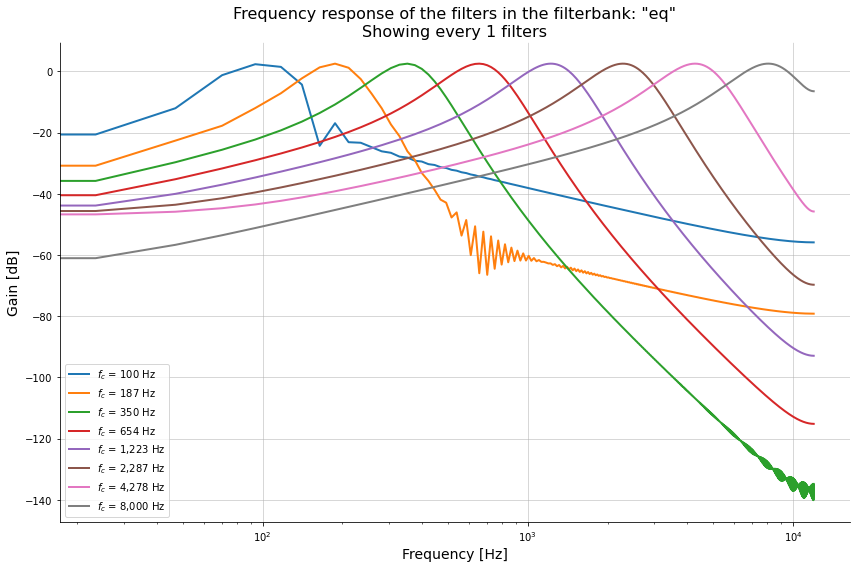

In [10]:
dhasp.show_filterbank_responses('eq', show_every=1)

Let's also view the total (summed) response:

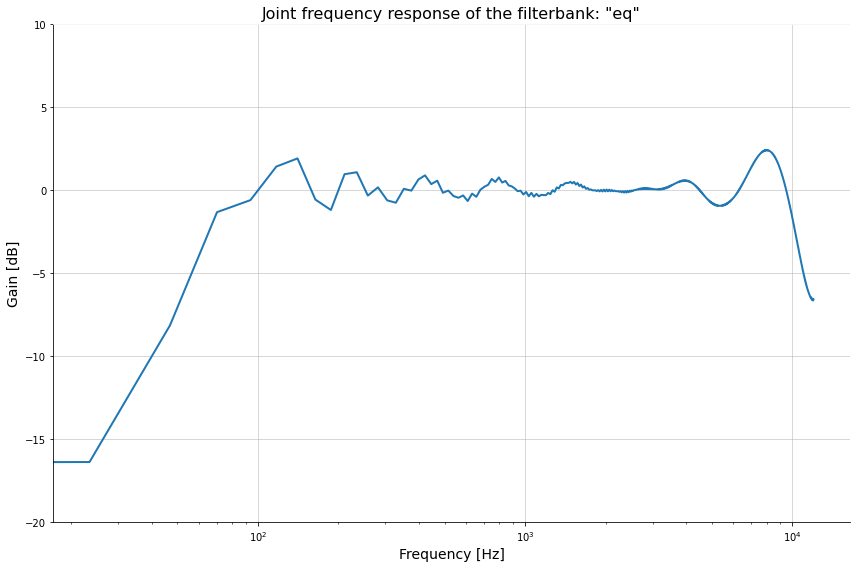

In [11]:
dhasp.show_filterbank_joint_response('eq')

It looks good, our code is doing what it should.

Now that we have defined the EQ filter, we can now assign a gain $g_i$ to each frequency band, and apply the modified filter it to a speech signal $\mathbf{x_i}$. We can then feed the filtered signal to our neural network and try optimize the gains $g_i$ for best speech intelligibility by minimizing the loss function $L$:

$$
G_{\text{optimized}} = \underset{G}{\text{argmin}} L \left( f(G, X), Y \right)
$$

where: $G = \left\{ {g_1, g_2, \cdots, g_8}  \right\}$ a matrix containing the gains for our EQ, $X = \left\{ \mathbf{x_1}, \mathbf{x_2}, \cdots  \right}$  matrix in which each row represents an speech signal, and $Y = \left\{ \mathbf{y_1}, \mathbf{y_2}, \cdots  \right}$ a matrix where each row represents a corresponding target (clear) speech signal. $f(G, \mathbf{x})$ represents a speech signal after having been fitered with our EQ, i.e.:

$$
\begin{align}
f(G, x)
&= \text{conv} \left(  G  \mathbf{h_{\text{eq}}}, \mathbf{x}  \right) \\
&= \text{conv} \left(  \sum_i g_i \mathbf{h_{\text{eq}}^{(i)}}, \mathbf{x}  \right)
\end{align}
$$

## The auditory model

The structure of the auditory model is shown in Figure XXX. The input signal first goes through two filterbanks: an analysis filterbank and a control filterbank, both consisting of 32 bandpass filters with varying properties. Based on the output of the control fliterbank, a dynamic-range compression gain is calculated for frequency band and applied to the outputs of the filters in the analysis filterbank. The output of the auditory model is then calculated as amplitude envelopes (in dB) of the compressed outputs of the filters in the analysis filterbank.

<center>
<br>
<img src="resources/graphics/dhasp_differentiable_auditory_model.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

### The filterbanks

The coefficients of the filterbanks in the auditory model are calculated in the same way as the coefficients for the EQ applied to the noisy signal described in section XXX, i.e.:

$$
\mathbf{h}[n] =
c_{\text{norm}}^{(i)}
\left(  \frac {n} {f_s}  \right) ^ {(N - 1)}
\exp \left(  -2 \pi b^{(i)} \frac {n} {f}  \right)
\cos \left(  2 \pi f  \frac {n} {f_s}   \right)
$$


#### Center frequencies


In the **analysis** filterbank, the center frequencies are in the Mel scale and cover the e range from 80 Hz to 8 kHz. To calculate them, I have created functions that convert Hz to Mel and vice versa. The computation is then conducted as follows:

In [12]:
# Define the number of filters: I.
I = 32

# Calculate the frequencies for the analysis filterbank.
f_a = t.dsp.mel2hz(torch.linspace(
    t.dsp.hz2mel(80),
    t.dsp.hz2mel(8000),
    I
)).reshape(I, 1)

# Show the first 3 and last 3 frequencies.
print(f'{f_a[:3, :]=}')
print(f'{f_a[-3:, :]=}')

f_a[:3, :]=tensor([[ 80.0000],
        [143.1066],
        [211.3189]])
f_a[-3:, :]=tensor([[6746.3504],
        [7348.8042],
        [8000.0000]])



In the **control** filterbank, the center frequencies are given by equation 3 in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571).

$$
f_{\text{c}}^{(i)} =
165.4
\left(
    10^{
        (1 + s)
        \log_{10}
        \left( 1 + f_{\text{a}}^{(i)} / 165.4 \right)
        }
    - 1
\right)
$$

Here, I have corrected a mistake in the paper, where $f_{\text{a}}$ was replaced by $f_{\text{c}}$.

#### Bandwidths

The bandwidths of the **analysis** filterbank are in the equivalent rectangular bandwidth (ERB) scale for the normal hearing model. The formula for calculating the ERB for a given frequency is taken from the paper: [Suggested formulae for calculating auditory-filter bandwidths and excitation patterns](https://pubmed.ncbi.nlm.nih.gov/6630731/). I have implemented the formula in the function `erb`, so that the bandwidths can be calculated as:

In [13]:
# Calculate the bandwidths for the analysis filterbank.
b_a = t.dsp.erb(f_a)

# Show the first 3 and last 3 bandwidths.
print(f'{f_a[:3, :]=}')
print(f'{f_a[-3:, :]=}')

f_a[:3, :]=tensor([[ 80.0000],
        [143.1066],
        [211.3189]])
f_a[-3:, :]=tensor([[6746.3504],
        [7348.8042],
        [8000.0000]])


The bandwidth of the filters in the control filterbank is derived from equation 2 in [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) by setting $attn_o = 50$, resulting in

$$
b_c = 4 b_a
$$

We can now test whether our implementation of the filters is correct. The test of all filters can be done by running the the command:

`
import tests.test_dhasp_filters
`

To save space, we will in this notebook show only the filters of the analysis filterbank.

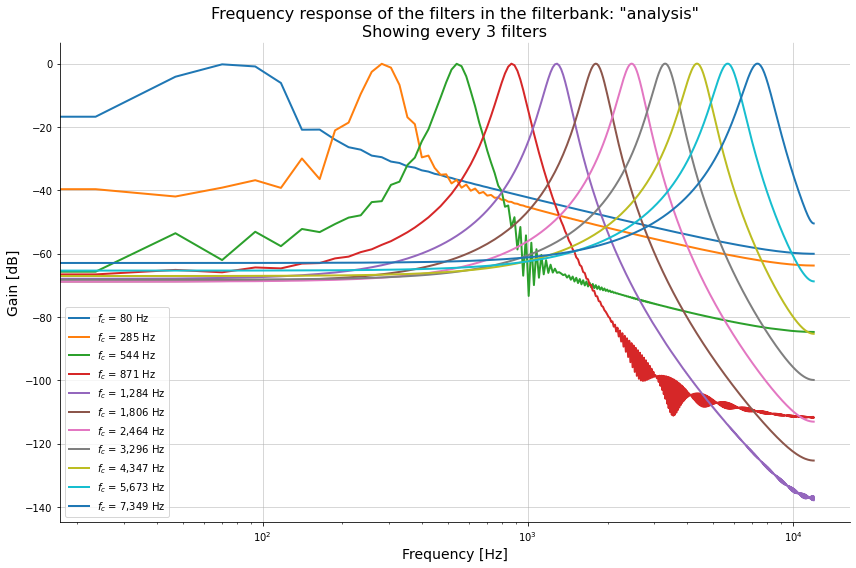

In [14]:
dhasp.show_filterbank_responses('analysis', show_every=3)

Also here everything seems ok.

### Dynamic-range compression

After being filtered in the analysis filterbank, the signal is compressed. The compression rate for each frequency band is determined by the envelope of the output of the corresponding frequency band in the control filterbank. The authors of the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) do not specify what kind of envelope they have in mind, but I will in the following assume that they mean amplitude envelope.

Now, in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571), the compression gain in dB is defined in equation 4:

$$
G_{\text{comp}}^{(i)}(n) =
- \text{attn}_o
- \left(
    1
    - \frac {1} {CR}
\right)
\left(
    \theta_{\text{low}}
     - \hat{E}_{\text{c}}^{(i)}(n)
\right)
$$

where:

$$
\hat{E}_{\text{c}}^{(i)}(n) =
\max \left(
    \theta_{\text{low}},
    \min \left(
        E_{\text{c}}^{(i)}(n),
        \theta_{\text{high}}
    \right)
\right)
$$

and:

- $CR$ is the compression ratio which is 1.25 at 80 Hz and linearly increases to 3.5 at 8 kHz.
- $E_{\text{c}}^{(i)}$ is the amplitude envelope, expressed in dB, of the output of the $i^\text{th}$ frequency band in the control filter.
- $\text{attn}_o$ is the hearing loss for outer hair cells in dB. In our case it is equal to 0 dB as we are modelling auditory processing of a person with normal hearing.
- $\theta_{\text{low}} = \text{attn}_o + 30 = 30$
- $\theta_{\text{high}} = 100$

But this expression is wrong. Now, the authors of the article specify the magnitude of the envelope $E_{\text{c}}$ in dB without specifying a reference, but let's explore some possible interpretations. If by "dB", they mean dBFS (dB full scale), we get:

$$
\begin{alignat*}
    & E_{\text{c}}^{(i)}(n) && = [-\infty, 0]  \\
    \Rightarrow & \hat{E}_{\text{c}}^{(i)}(n) && =
                  \max \left(
                        0,
                        \min \left(
                            [-\infty, 0],
                            100
                        \right)
                  \right) \\
           & && = \max \left(
                        0,
                        [-\infty, 0]
                  \right) \\
           & && = 0
\end{alignat*}
$$

As we can see, in this case $\hat{E}_{\text{c}}$ is always zero. I therefore assume that $E_{\text{c}}$ must be expressed in dB SPL, in which case $\hat{E}_{\text{c}}$ will always lie in the interval from 30 to 100 dB SPL.

To know the value in dBSPL, we need a reference. From experience, I have set it so that -18 dBFS corresponds to 60 dB SPL.

Great, we have solved one problem. Now, let's look at the equation for calculating the compression gain $G_{\text{comp}}$:

$$
G_{\text{comp}}^{(i)}(n) =
- \text{attn}_o
- \left(
    1
    - \frac {1} {CR}
\right)
\left(
    \theta_{\text{low}}
     - \hat{E}_{\text{c}}^{(i)}(n)
\right)
$$

with $\text{attn}_o = 0$, $\theta_{\text{low}} = 30$ and $\hat{E}_{\text{c}} = [30, 100]$ we get:

$$
\begin{align}
    G_{\text{comp}}^{(i)}(n) & =
    - \left(
        1
        - \frac {1} {CR}
    \right)
    \left(
        30
         - [30, 100]
    \right) \\
    & = \left(
        \frac {1} {CR}
        - 1
    \right)
    [-70, 0]
\end{align}
$$

Therefore, for lowest speech levels, $G_{\text{comp}} = 0 \ \text{dB} = 1$. For highest levels, it is:

$$
\begin{align}
    G_{\text{comp}}^{(i)}
    & = -70 \left(
        1
        - \frac {1} {CR}
    \right)
    & = 70 \left(
        1 -
        \frac {1} {CR}
    \right)

\end{align}
$$

It follows from this that the higher the level, the higher the gain that is applied to the signal, which is obviously the opposite of compression. Therefore, the true expression for $G_{\text{comp}}$ must be:

$$
G_{\text{comp}}^{(i)}(n) =
\left(
    \frac {1} {CR}
    - 1
\right)
\left(
    \hat{E}_{\text{c}}^{(i)}(n)
    - \theta_{\text{low}}
\right)
$$

In this equation, the gain is inversely proportional to the signal strength. For $CR = 1$, the gain is 0 dB regardless of signal strength, and for $CR \rightarrow \infty$, the gain becomes exacly the opposite of amount by which the signal's strength surpasses the threshold $\theta_{\text{low}}$. In other words, it is exactly what one would expect from a compressor.

Fantastic. Now, how do we calculate an amplitude envelope? We take the absolute of the [Hilbert transform](https://en.wikipedia.org/wiki/Hilbert_transform) of the signal. I have implemented a version of such a transform that also works in PyTorch in the function `envelope` in the module `[project_root]/toolbox/dsp.py`. Let's test if it works:

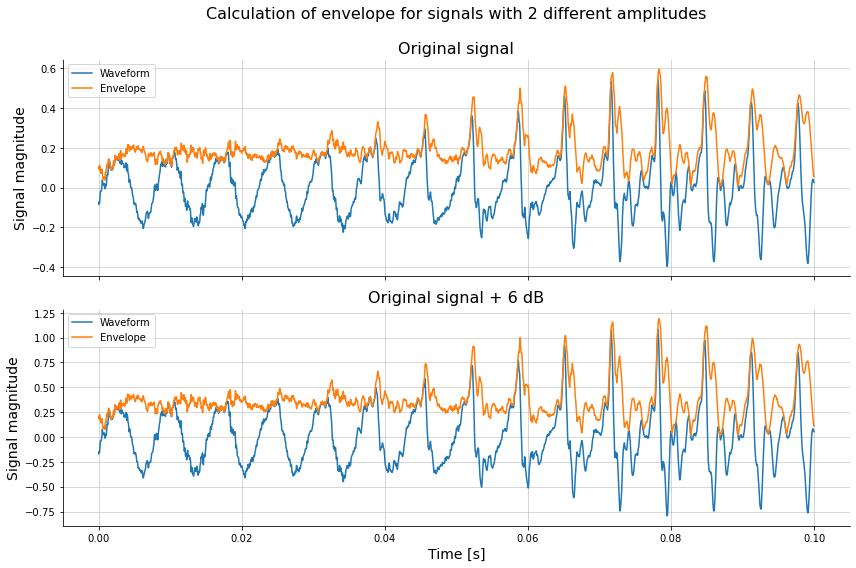

In [15]:
tests.test_envelope()

Hep hey, it works. Now, let's see if the same works for calculation of the compression gain:

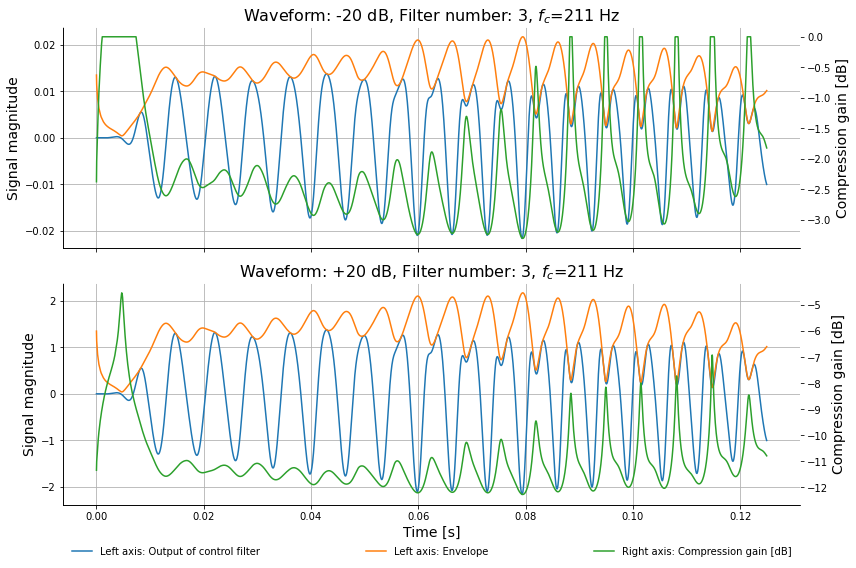

In [16]:
tests.test_compression()

We can see that the envelope nicely follows the signal amplitude and that the compression gain rises with falling signal level, and never surpasses 0 dB.

### The output of the auditory model

Now that we have the functional filterbank and compressor, we can calculate the output of the auditory model, which consist of the amplitude envelope, in dB (this time we will use dBFS as the reference will no longer matter), of the compressed ouput of each of the filters in the analysis filterbank:

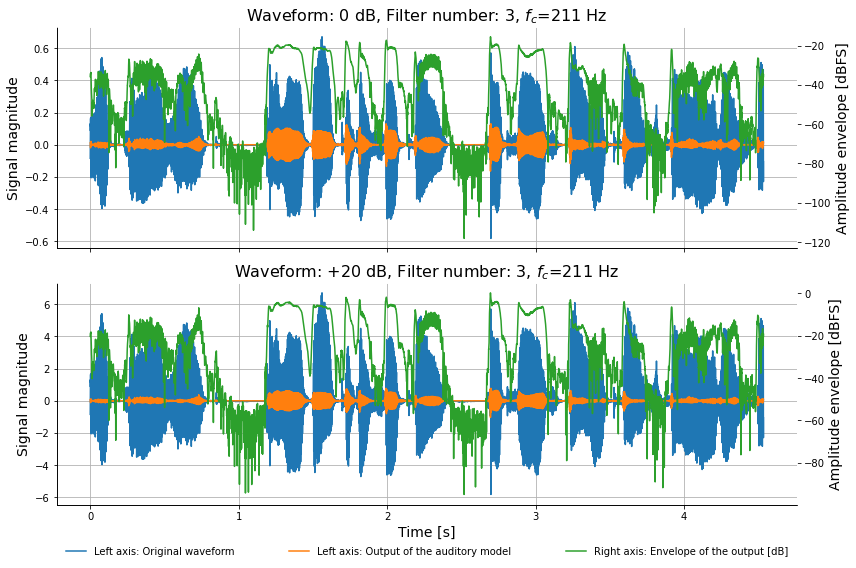

In [17]:
tests.test_output_auditory_model()

Looks good, we can see the the original waveform, the output of 3rd filter, and the envelope are well aligned, and that the magnitude of filtered signal is significantly lower than that of the original signal, which is exactly what we would expect. We can also see that the envelope seems to follow the amplitude of the *filtered* signal well. It seems that our model is functional.

## The objective function

With the auditory model in place we can compute the simulated output of the human auditory processing for any signal. Given two signals containing the same speech segment in different acoustic conditions, e.g. noisy and noiseless, we can use our EQ to try to make these signal equally intelligible.

To do that, we need a measure of similarity. Such measure is described in section 3.3 of the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571), and consists of a combination of a cepstral correlation measure and an energy control function, which I will describe in the following sections.

### Cepstral correlation measure

The cepstral correlation measure is defined in the equation 9 of the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) as a correlation between two cepstral sequences, each of which is calculated as follows:

$$
C^{(j)}(m)
= \sum_{i=1}^I b_j E(i)(m)
$$

where:

 - $E(i)(m)$ is a *__smoothed__* envelope, in dBFS, of the output of the $i^{\text{th}}$ frequency band of the auditory model. The smoothing is performed using a 16 ms Hann window with 50% overlap
 - $b_j$ are a set of half-cosine basis functions are similar to the principal components for the short-time spectra of speech [19] and have been used for consonant and vowel recognition [20, 21].

The normalized cepstral correlation between the sample and and a target for each basis function is then calculated as:

$$
R(j) = \frac
{
    \sum_m C_{target}^{(j)}(m)  C_{sample}^{(j)}(m)
}
{
    \sqrt {
        \sum_m \left(
            C_{target}^{(j)}(m)
        \right)^2
    }
    \sqrt {
        \sum_m \left(
            C_{sample}^{(j)}(m)
        \right)^2
    }
}
$$

Ok, now, let's compute the cepstral sequences. To do this, we must first implement a smoothing function. This is done in the function `smooth_output_envelope` in the module `[project_root]/toolbox/dhasp.py`, where we convolve the smoothed signal with a hanning window of 16 ms, setting the stride to 8 ms.

Let's verify that it works:

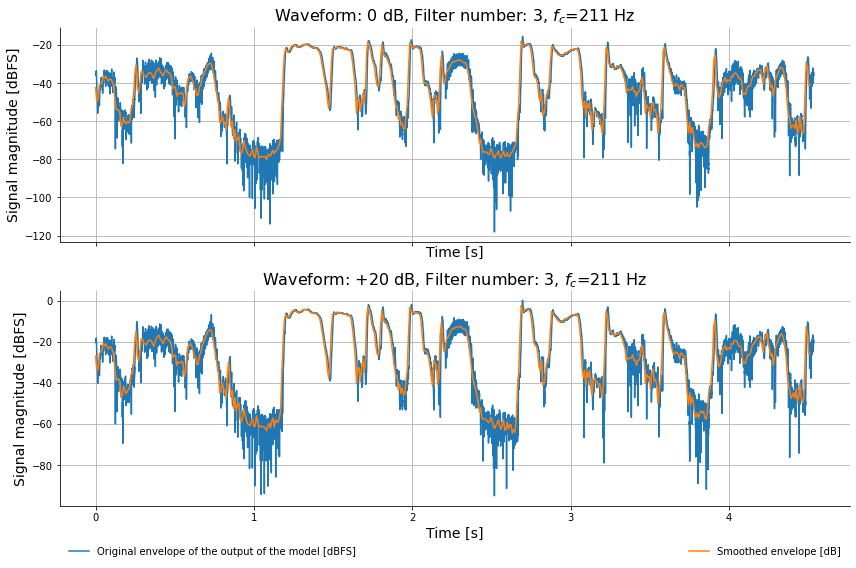

In [18]:
tests.test_smoothing_output_envelope()

It seems that our code is performing the smoothing correctly. Now, let's test whether the same goes for calculation of the cepstral sequences:

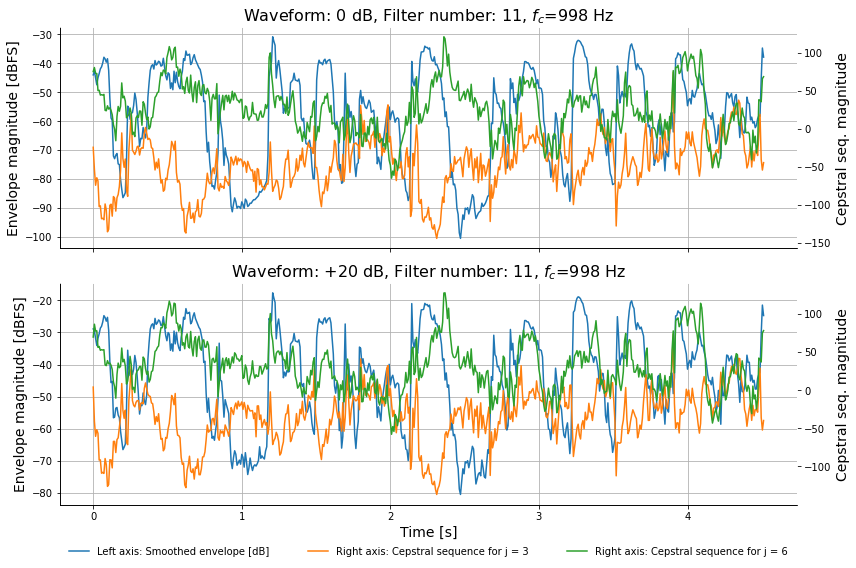

In [19]:
tests.test_cepstral_sequence()

It is of course difficult to assess whether the values of the chosen cepstral sequences are correct just by looking at the data, but the dimensions of the output are correct, and the calculation is rather straightforward, so also here it seems that the code is working.

### Energy control function

To prevent the over-amplification of the signal under optimization, the authors of the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) introduce an "energy control loss" defined as:

$$
L_e^{(i)} = \sum_m \max \left(
    E_{\text{sample}}^{(i)}(m) - E_{\text{target}}^{(i)}(m),
    0
\right)
$$

This function simply penalizes signals whose envelope at any point, in any frequency band, exceeds the envelope of the target.

### The *Rubino* energy control function

In our case, it might make more sense to aim at keeping the *overall* signal strength as close to the signal strength of the target signal. I therefore propose a different measure, which I will call the *Rubino energy loss* after a great Danish scientist Wojciech Rubino:

$$
L_{e, \text{Rubino}} =
    \left|
        20 \log_{10} \left(
            \sum_i \sum_m \left(
                10^{
                    \frac { E_{\text{target}}^{(i)}(m) } { 20 }
                }
            \right)
        \right)
        - 20 \log_{10} \left(
            \sum_i \sum_m \left(
                10^{
                    \frac { E_{\text{sample}}^{(i)}(m) } { 20 }
                }
            \right)
        \right)
    \right|
$$

This loss penalizes *any* difference between input and the target with respect to the sum of the energies of the envelopes of the simulated outputs of the auditory processing. This means that a filter that amplifies one frequency band and attenuates another can still have en energy control loss of 0 as long as the sum of energies in all the frequency bands remains equal to that of the target. Intuitively, this is what we want, but such a behavior would be penalized if use the original loss $L_e$.


### Total loss

The loss is divided by the equation 12 in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) as a combination of the cepstral correlation measure and an energy control loss:

$$
L =
 - \frac {1} {5} \sum_{j=2}^{6} R(j)
+ \alpha \sum_i L_e^{(i)}
$$

where $\alpha > 0$ is a coefficient which can be freely chosen by the designer of the model.

If we instead use the Rubino energy loss, the total loss is calculated as:

$$
L_{\text{Rubino}} =
 - \frac {1} {5} \sum_{j=2}^{6} R(j)
+ \alpha L_{e, \text{Rubino}}
$$

And that's it - we should now have everything we need to quantify and compare the intelligibility of two signals. Let's test that on 10 different variants of the same speech segment, using the clean speech as reference:

In [20]:
tests.test_cepstral_correlation_and_total_loss(alpha_original=1e-5,
                                               alpha_rubino=0.02)

,Variant,R,L_e_original,L_e_rubino,L_original,L_rubino
0,zoom_augmented_f1_c1,0.81,"80,046.01",0.03,-0.01,-0.81
1,zoom_augmented_f1_c4,0.70,"154,911.84",1.54,0.85,-0.66
2,zoom_augmented_f4_c1,0.66,"140,987.88",6.16,0.75,-0.53
3,zoom_augmented_f4_c4,0.60,"205,920.35",7.05,1.46,-0.46
4,babble,0.71,"81,953.87",0.84,0.11,-0.69
5,distorted,0.52,"130,384.89",0.79,0.78,-0.50
6,music,0.61,"93,008.35",0.94,0.32,-0.59
7,tv,0.52,"119,213.03",0.05,0.68,-0.52
8,zoom,0.79,"54,616.06",0.05,-0.25,-0.79
9,clean,1.00,0.00,0.00,-1.00,-1.00


In the table above, we can see the calculated parameters of the loss function for the the tested variants. We can see that the results make sense: the clean variant gets the highest cepstral correlation score $R$. All the other variants result in lower cepstral correlation and higher loss. We can also see that choice of the energy loss $L_e$ and the $\alpha$ can have a profound effect on the result.

# How to use the developed tools for training

Let's now take a look at how to use the tools developed in this project to train a network. I will guide you through the process step by step.

## Load audio

First, we need some audio to process. Let's see which data we have in our audio database with synthetic speech.

In [8]:
display(df_synthetic_speech.sample(3))

,speaker,length,variant,segment,fullness,clarity,audio_path
2643,kimberly,5s,music,36,NaN,NaN,cut_5_s\kimberly\musi\36.wav
3063,matthew,5s,tv,19,NaN,NaN,cut_5_s\matthew\tele\19.wav
1299,justin,5s,zoom_augmented,9,4,1,cut_5_s\justin\4-1\9.wav


Let's view the available variants (acoustic conditions):

In [9]:
display(df_synthetic_speech['variant'].unique())

array(['zoom_augmented', 'babble', 'distorted', 'music', 'tv', 'zoom',
       'clean'], dtype=object)

Now, let's take take out some samples for our model:

In [10]:
# Load audio samples representing the same speech segment in different
# acoustic conditions.
fs_model = 24e3
audio_samples, _ = t.data_loading.get_waveforms_synthetic_speech(
    dict(
        variant=['clean', 'tv', 'babble', 'zoom'],
        length='5s',
        segment=[7, 8, 9, 10]
    ),
    fs_model
)

# Show the shapes of the tensors containing the clean and noisy speech.
print(f'{audio_samples["clean"].shape = }')
print(f'{audio_samples["tv"].shape = }')
print(f'{audio_samples["babble"].shape = }')

audio_samples["clean"].shape = torch.Size([36, 108844])
audio_samples["tv"].shape = torch.Size([36, 108844])
audio_samples["babble"].shape = torch.Size([36, 108844])


## Creating inputs and targets for the model

Now, let's divide the audio samples in two groups: one containing the clean speech signal (target) and one containing their noisy counterparts (input):

In [11]:
# Waveforms for the input of the model.
X_input = torch.vstack([
    audio_samples['tv'],
    audio_samples['babble'],
    audio_samples['zoom'],
])

# Target waveforms.
X_target = audio_samples['clean'].repeat(3, 1)

# Show the shape of the results.
print(f'{X_input.shape = }')
print(f'{X_target.shape = }')

X_input.shape = torch.Size([108, 108844])
X_target.shape = torch.Size([108, 108844])


Great, now we have the waveforms. But our model will also learn from the combination of the cepstral sequences and the smooth energy envelopes of the simulated output of human auditory processing. Let's calculate them for every waveform:

In [24]:
# Load from cache.
X_input, X_target, C_input, C_target, E_input, E_target = \
    t.data_loading.load_model_inputs()

print(f'{C_input.shape = }')
print(f'{E_input.shape = }')
print(f'{C_target.shape = }')
print(f'{E_target.shape = }')

C_input.shape = torch.Size([108, 5, 565])
E_input.shape = torch.Size([108, 32, 565])
C_target.shape = torch.Size([108, 5, 565])
E_target.shape = torch.Size([108, 32, 565])


In [15]:
# # Initialize the result tensors
# C_input = torch.Tensor()
# E_input = torch.Tensor()
# C_target = torch.Tensor()
# E_target = torch.Tensor()
#
# # Get the cepstral sequences and envelopes for target and input.
# # We use a "for" loop as feeding a large X matrix directly into the
# # function calculate_C would use up all the RAM.
# for idx_waveform in range(X_input.shape[0]):
#     C_input_tmp_i, E_input_tmp_i = dhasp.calculate_C(
#         X_input[idx_waveform, :].reshape(1, -1),
#         from_value_type='waveforms')
#
#     C_target_tmp_i, E_target_tmp_i = dhasp.calculate_C(
#         X_target[idx_waveform, :].reshape(1, -1),
#         from_value_type='waveforms')
#
#     C_input = torch.cat((C_input, C_input_tmp_i), dim=0)
#     E_input = torch.cat((E_input, E_input_tmp_i), dim=0)
#     C_target = torch.cat((C_target, C_target_tmp_i), dim=0)
#     E_target = torch.cat((E_target, E_target_tmp_i), dim=0)
#
# # Save all the network inputs for later use.
# t.data_loading.save_model_inputs(
#     X_input, X_target, C_input, C_target, E_input, E_target)
#
# # Show the shape of the results.
# print(f'{C_input.shape = }')
# print(f'{E_input.shape = }')
# print(f'{C_target.shape = }')
# print(f'{E_target.shape = }')

C_input.shape = torch.Size([108, 5, 565])
E_input.shape = torch.Size([108, 32, 565])
C_target.shape = torch.Size([108, 5, 565])
E_target.shape = torch.Size([108, 32, 565])


Fantastic, now we have the inputs to our network. We will now organize the nicely in datasets and loaders.

## Creating datasets and data loaders

To facilitate the handling of the data, we will now create a PyTorch dataset for our data. Note that we normalize the items in our dataset that will be used as inputs to the neural network, i.e. `C_input` and `E_input`, so that they are both represented in the same scale, constricted to values between 0 and 1.

In [28]:
class AudioDataset(Dataset):
    def __init__(self, X_input, C_input, E_input, C_target, E_target):
        self.X_input = X_input
        self.C_input = self.scale(C_input)
        self.E_input = self.scale(E_input)
        self.C_target = C_target
        self.E_target = E_target

    # Define the scaling function.
    def scale(selfm, data: torch.Tensor):
        return (data - torch.min(data)) / (torch.max(data) - torch.min(data))

    def __len__(self):
        return self.X_input.shape[0]

    def __getitem__(self, idx):
        X_sample = self.X_input[idx, :]
        X_sample.requires_grad = False

        C_sample = self.C_input[idx, :].flatten()
        C_sample.requires_grad = False

        E_sample = self.E_input[idx, :].flatten()
        E_sample.requires_grad = False

        C_target = self.C_target[idx, :]
        C_target.requires_grad = False

        E_target = self.E_target[idx, :]
        E_target.requires_grad = False

        return X_sample, C_sample, E_sample, C_target, E_target

Finally, we can create loaders for the train and test data. To do so, we create a function, so that we can repeat this action later more conveniently.

In [29]:
def init_data(n_train, batch_size,
              X_input, C_input, E_input, C_target, E_target):
    # We shuffle the data before division into a training and test
    # dataset.
    idx_shuffle = torch.randperm(X_input.shape[0])
    idx_train = idx_shuffle[:n_train]
    idx_test = idx_shuffle[n_train:]

    # Create the training dataset:
    dataset_train = AudioDataset(X_input[idx_train, :],
                                 C_input[idx_train, :],
                                 E_input[idx_train, :],
                                 C_target[idx_train, :],
                                 E_target[idx_train, :])

    # Create the test dataset:
    dataset_test = AudioDataset(X_input[idx_test, :],
                                C_input[idx_test, :],
                                E_input[idx_test, :],
                                C_target[idx_test, :],
                                E_target[idx_test, :])

    # Create dataloaders.
    dataloader_train = DataLoader(dataset_train,
                                  batch_size=batch_size,
                                  shuffle=True)
    dataloader_test = DataLoader(dataset_test,
                                 batch_size=batch_size,
                                 shuffle=True)

    return dataloader_train, dataloader_test

Ok, let's test our function using two thirds of the data for training. Also, let's use a batch size of 5:

In [32]:
# Specify the number of observations to be used for training.
n_train = int(X_input.shape[0] * 2 / 3)

# Speciy the batch size
batch_size = 5

# Get the dataloaders.
dataloader_train, dataloader_test = init_data(
    n_train, batch_size,
    X_input, C_input, E_input, C_target, E_target
)

Ok, so our data is ready. Now, we need a network we can use to process them.

## Create a neural network

Let's first recall how we want to structure our model:

- The input to our network will be a vector containing flattened, normalized versions of the cepstral sequences `C_input` and smoothed energy envelopes `E_input` .
- The output of our network will be the gain coefficients for the 8 frequency bands of our EQ filter.
- The the output EQ will be applied to the waveform `X_input` and evaluated against the cepstral sequences and smoothed energy envelopes of the target `C_target` and `E_target`.

Great, we still have a plan. Now, let's initialize a simple neural network. That can take care of the training. Once again, we wrap the initialization in a function to make it more convenient to repeat the action later.

In [33]:
def init_model(n_in, n_out):
    # Initialize a simple network with two hidden layers with 30 nodes each.
    model = nn.Sequential(
        nn.Linear(n_in, 30),
        nn.ReLU(),
        nn.Linear(30, 30),
        nn.ReLU(),
        nn.Linear(30, n_out),
    )

    # Initialize weights.
    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_uniform(m.weight)
            m.bias.data.fill_(0.01)

    model.apply(init_weights)

    return model

Let's test this function:

In [34]:
# Initialize the network.
test_model = init_model(100, 3)

# Display the model.
print(f'{test_model = }')

# Perform a forward pass.
output_test_model = test_model(torch.rand(2, 100))

# Show the output of the network.
print(f'\n{output_test_model = }')

test_model = Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=3, bias=True)
)

output_test_model = tensor([[-0.5245,  0.1463, -0.4274],
        [ 0.0330, -0.3810, -0.6277]], grad_fn=<AddmmBackward>)


It works. Now we will need a criterion against which we can evaluate our output.

## The loss function

As stated before:

- The output of our network will be the gain coefficients for the 8 frequency bands of our EQ filter.
- The the output EQ will be applied to the waveform `X_input` and evaluated against the cepstral sequences and smoothed energy envelopes of the target `C_target` and `E_target`.

So how do we want to express our gain coefficients? My proposal is to map them so that they represent the gains in dB in the range from -20 to 20. For that, we will use a sigmoid function:

In [35]:
def interpret_G(G: torch.Tensor):
    # Squeeze the values to a range between -20 dB and +20 dB
    # and convert from dB to linear gain.
    return t.dsp.db2mag(40 * torch.sigmoid(G / 10) - 20)

And now to the loss.

First of all we will want to constrict the EQ'ed input signal to values between -1 and 1 (the audio signal range).

We will also need to choose how to calculate the energy loss. As I would like the level of the EQ'ed signal to match that of the target, I will use the Rubino energy loss. With regard to `alpha`, we know that the value of R ranges from 0 to 1. We must therefore adjust `alpha` so that the magnitude of the energy loss doesn't completely overshadow out efforts to match the cepstral sequences. Therefore, I have chosen `alpha` so that that each 1 dB of average difference between the result and the target with regard to the sum of envelope energies will increase the loss the loss by 0.01.

Ok, let's now define the loss function:

In [36]:
def calculate_loss(C_target, E_target, X_input, G_eq, alpha=0.01,
                   rubino=True):
    # Apply the equalizer.
    X_input_eq = dhasp.apply_filter('eq',
                                    X_input,
                                    interpret_G(G_eq),
                                    joint_response=True)

    # Apply thresholds at -1 and 1.
    X_input_eq = nnf.threshold(X_input_eq, -1, -1)
    X_input_eq = -nnf.threshold(-X_input_eq, -1, -1)

    # Calculate cepstral sequences and smoothed energy envelopes for
    # the equalized input.
    C_input_eq, E_input_eq = dhasp.calculate_C(
        X_input_eq,
        from_value_type='waveforms'
    )

    # Calculate the cepstral correlation coefficient and
    # energy control coefficient for each observation.
    R = dhasp.calculate_R(C_target, C_input_eq)
    L_e = dhasp.calculate_L_e(E_target, E_input_eq, rubino=rubino)

    # Calculate the total loss.
    L = dhasp.calculate_L(R, L_e, alpha=alpha, rubino=rubino)

    # Return mean loss for the batch.
    return L.mean()

And now, let's move over to training the network.

## The training function

We're almost there - the time has now come to train the network. Once again, let's first build a function that will do most of the dirty work for us, so that we can easier play with the parameters later. The function will return the end state of the model, the state of the model that obtained the best batch training loss, and the learning curves.

In [95]:
from IPython.display import clear_output

# Print info about the progress.
def print_progress(idx_epoch, idx_batch,
                   losses_train, losses_test,
                   gains_test):
    # Function that prints one batch
    def print_info(loss_train, loss_test, gains):
        # Print the info.
        print(f'G [dB]: [{gains_str(gains)}]'
              f'\nTraining Loss: {loss_train:.3f}'
              f'\nTest Loss: {loss_test:.3f}')

    def gains_str(gains):
        return (', '.join([
            f'{gain:.2f}' for gain in gains
        ]))

    clear_output(wait=True)

    np.ceil(len(losses_train) / 50) * 50

    # Plot progress.
    figure, axes = plt.subplots(figsize=(8, 2))
    axes.plot(losses_train, label='Train loss')
    axes.plot(losses_test, label='Test loss')
    axes.set_xlim([0, np.ceil(len(losses_train) / 50) * 50])
    axes.set_ylim([-1, 0.5 * np.ceil(
        2 * np.max(np.array(losses_train + losses_test)))])
    axes.set_xlabel('Batch test number')
    axes.set_ylabel('Loss')
    axes.legend()
    axes.grid()
    plt.show()

    # First batch
    print(f'First batch:')
    print_info(losses_train[0], losses_test[0], gains_test[0])

    # Finish if only one result is available
    if len(losses_train) < 2:
        return

    # Previous batch
    print(f'\nPrevious batch:')
    print_info(losses_train[-2], losses_test[-2], gains_test[-2])

    # Current batch.
    print(f'\nCurrent batch: '
          f'\nEpoch: {idx_epoch + 1}, '
          f'Batch: {idx_batch + 1}')
    print_info(losses_train[-1], losses_test[-1], gains_test[-1])

In [96]:
def train_network(model,
                  dataloader_train,
                  dataloader_test,
                  optimizer,
                  criterion=calculate_loss,
                  num_epochs=10,
                  alpha=5e-2,
                  rubino=True,
                  print_every=1
                  ):
    # Initialize the lists where we will store the learning progress.
    losses_train = list()
    losses_test = list()
    gains_test = list()

    # Initialize the test counter.
    counter = 1

    for idx_epoch in range(num_epochs):
        for idx_batch, (data_train, data_test) in enumerate(
                zip(dataloader_train, dataloader_test)):

            # Get the training data.
            (X_input_train, C_input_train, E_input_train,
             C_target_train, E_target_train) = data_train

            # Get the test data.
            (X_input_test, C_input_test, E_input_test,
             C_target_test, E_target_test) = data_test

            # Generate the inputs to the network
            input_train = torch.hstack([C_input_train,
                                        E_input_train])

            input_test = torch.hstack([C_input_test,
                                       E_input_test])

            # Enter the training mode.
            model.train()

            # Zero the gradients.
            optimizer.zero_grad()

            # Conduct the forward pass.
            G_eq_train = model(input_train)

            # Calculate the training loss.
            # loss = criterion(output, labels)
            loss_train = criterion(C_target_train,
                                   E_target_train,
                                   X_input_train,
                                   G_eq_train,
                                   alpha=alpha,
                                   rubino=rubino)

            # Append the training loss to loss history.
            losses_train.append(loss_train.data.numpy())

            # Enter the evaluation mode.
            model.eval()

            # Calculate the model
            with torch.no_grad():
                # Conduct the forward pass on test data.
                G_eq_test = model(input_test)

                # Calculate the training loss.
                # loss = criterion(output, labels)
                loss_test = calculate_loss(C_target_test,
                                           E_target_test,
                                           X_input_test,
                                           G_eq_test)

                # Store the loss.
                losses_test.append(loss_test.data.numpy())

                # Store the gains for the first sample.
                gains_test.append(t.dsp.mag2db(
                    interpret_G(G_eq_test[0, :])).numpy())

                # Save the parameters of the best model.
                if idx_batch == 0 & idx_epoch == 0:
                    best_loss = loss_train.data.numpy()

                if loss_train.data.numpy() <= best_loss:
                    best_loss = loss_train.data.numpy()
                    best_model_state_dict = model.state_dict()
                    torch.save(best_model_state_dict,
                               paths.cache.model_best)

                # Print info about the progress.
                if counter % print_every == (print_every - 1):
                    print_progress(idx_epoch, idx_batch,
                                   losses_train, losses_test, gains_test)

            # Enter the training mode.
            model.train()

            # Conduct the backward pass.
            loss_train.backward()

            # Optimize the parameters.
            optimizer.step()

            # Increment the test counter.
            counter += 1

    # Sate the state dict of the the last model of the training
    # session.
    torch.save(model.state_dict(), paths.cache.model_last)

    # Print the final message.
    print('\nTraining done')

    return model, best_model_state_dict, losses_train, losses_test

## Training the network

We can now finally train our network. Thanks to the functions we have built, we can easily play with the parameters.

As mentioned before I with `alpha` = 0.02 so that that each 1 dB of average difference between the result and the target with regard to the sum of envelope energies will increase the loss the loss by 0.02.

We use two thirds of the data for training. The batch size is set to 3 samples. As optimizer, we go for the "classic" stochastic gradient descent.

We will show the status after every result for every result.

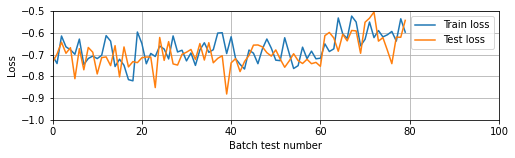

First batch:
G [dB]: [0.10, -0.17, 0.09, 0.64, 0.01, 0.27, 0.06, -0.04]
Training Loss: -0.705
Test Loss: -0.736

Previous batch:
G [dB]: [-17.14, -19.94, -18.17, -15.97, -11.25, 16.05, 14.95, -3.17]
Training Loss: -0.535
Test Loss: -0.620

Current batch: 
Epoch: 10, Batch: 8
G [dB]: [-17.27, -19.94, -18.27, -16.08, -11.25, 16.14, 15.26, -3.17]
Training Loss: -0.597
Test Loss: -0.543

Training done


In [99]:
# ---- CONFIGURE THE DATA ----
# Specify the number of observations to be used for training.
n_train = int(2 / 3 * X_input.shape[0])

# Specify the batch size
batch_size = 5

# Get the dataloaders.
dataloader_train, dataloader_test = init_data(
    n_train, batch_size,
    X_input, C_input, E_input, C_target, E_target
)

# ---- CONFIGURE THE MODEL ----
# Define the number of inputs and outputs to the neural network.
n_in = np.prod(C_input.shape[1:]) + np.prod(E_input.shape[1:])
n_out = np.prod(dhasp.f_eq.shape)

# Initialize the model.
model = init_model(n_in, n_out)

# ---- CONFIGURE THE OPTIMIZER ----
optimizer = optim.SGD(model.parameters(),
                      lr=0.01)

# optimizer = optim.Adam(model.parameters(),
#                        lr=1e-4,
#                        eps=1e-8)

# ---- TRAIN THE NETWORK ----
model, best_model_state_dict, losses_train, losses_test = train_network(
    model,
    dataloader_train,
    dataloader_test,
    optimizer,
    criterion=calculate_loss,
    num_epochs=10,
    alpha=0.02,
    rubino=True,
    print_every=1
)

## Evaluation of the results

Now, let's apply the findings to some files:

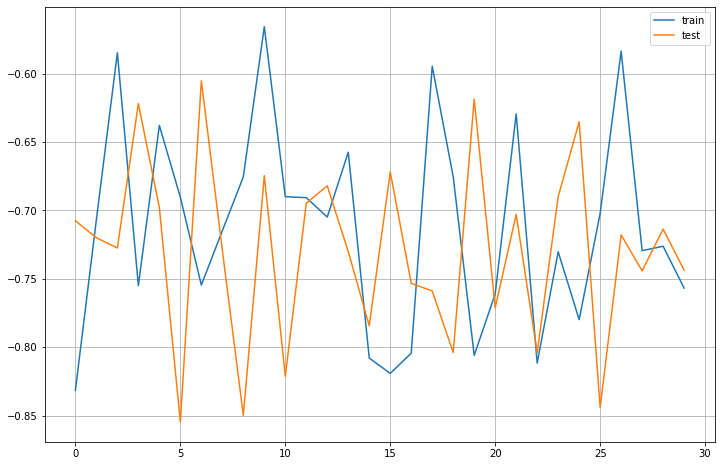

In [39]:
figure, axes = plt.subplots(figsize=(12, 8))
axes.plot(losses_train, label='train')
axes.plot(losses_test, label='test')
axes.grid()
axes.legend()

In [40]:
# Save model
path_model_pickle = paths.cache.root / 'model.pkl'
torch.save(model, path_model_pickle)

# To load:
model2 = torch.load(path_model_pickle)

In [48]:
# Get some audio samples to test.
audio_original = torch.vstack([
    audio_samples['tv'][3, :].reshape(1, -1),
    audio_samples['babble'][1, :].reshape(1, -1),
    audio_samples['zoom'][2, :].reshape(1, -1)
])

# Get the cepstral sequences and the smoothed envelope of the simulated
# output of the auditory processing.
C_original, E_original = dhasp.calculate_C(
    audio_original,
    from_value_type='waveforms'
)


def scale(data: torch.Tensor):
    return (data - torch.min(data)) / (torch.max(data) - torch.min(data))


# Create input for the neural net
input_original = torch.hstack([
    scale(C_original.reshape(C_original.shape[0], -1)),
    scale(E_original.reshape(E_original.shape[0], -1))
])


In [49]:
# Enter the evaluation mode.
model.eval()

with torch.no_grad():
    # Conduct the forward pass on the data.,
    G_eq_model = interpret_G(model(input_original))

    print(t.dsp.mag2db(G_eq_model))

tensor([[ 3.2739, -0.8107, -0.4887,  0.6847,  3.0043,  2.8950,  4.6871, -3.9938],
        [ 3.2880, -0.8272, -0.6241,  0.7485,  3.0035,  3.0048,  4.6287, -4.0932],
        [ 3.2867, -0.9053, -0.6571,  0.7335,  3.0042,  2.9990,  4.6845, -4.0993]])


In [50]:
# Apply the gain found by the model
audio_eq_by_model = dhasp.apply_filter('eq',
                                       audio_original,
                                       G_eq_model,
                                       joint_response=True)

In [51]:
def normalize(signal):
    # return signal / torch.max(signal)
    return signal


for i in range(audio_original.shape[0]):
    sd.play(normalize(audio_original[i, :]), fs_model, blocking=True)
    sd.play(normalize(audio_eq_by_model[i, :]), fs_model, blocking=True)

In [47]:
print(t.dsp.mag2db(G_eq_model))

tensor([[ 20.0000,  19.2674,  20.0000, -20.0000,  19.9615,  20.0000,  19.6223,
          12.5646],
        [ 20.0000,  -3.7247,  20.0000, -19.9898,  20.0000,  20.0000,  19.9992,
         -20.0000],
        [ 20.0000, -19.9929,  19.9994,  19.2824,  20.0000,  19.9910,  20.0000,
         -20.0000]])


# Discussion

In this project, I have created a PyTorch implementation of a differentiable objective function based on a [DHASP framework](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571), which I have adjusted so that it can be used to train a neural network with the objective of optimizing parameters of an equalizer to improve the intelligibility of a speech signal. I have demonstrated that the objective function works by utilizing it to train a simple neural network with two hidden layers. I have also built a system of toolboxes to facilitate the process of loading and accessing the audio data, as well as demonstrated and document each step in the development process.

I would have loved to have had more time for tweaking the model to see how good it could do at improving intelligibility, but after having put around 200 hours into this project, I had to stop. In fact, I didn’t plan to implement the part where I apply the objective function to a simple network, but having come this far I couldn’t help myself - deep learning can be addictive. I am, however, happy to leave a functional model that is ready to be tweaked, together with well-organized tools that can help one along. The implementation of the [DHASP framework](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) was in itself a challenging task, and without my experience from the audio industry, I am not sure I would have managed to do it in a sensible manner.

Regarding the setup: Raising the intelligibility of speech by applying an EQ alone is not an easy task, but I think the chances of success can be improved if we increase the number of frequency bands of our EQ, allowing for a more precise equalization. Also, it might be a good idea to add an extra EQ control for an overall gain. With regard to network architecture,  a convolutional network might do a good job at fiding patterns in cepstral spectra, and adjusting the parameters accordingly. It is, at least, worth a try.


# References

# End